# Predicting Parkinson's Disease using Bio Medical Voice Measurements

In [1]:
#Importing the necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#To enable plotting in Jupyter Notebook
%matplotlib inline

In [2]:
#To read the csv file "parkinsons.data" into a dataframe
df = pd.read_csv("parkinsons.data")

In [3]:
#To ensure the successful loading of the csv file
df.head(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
df.tail(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
175,phon_R01_S43_5,115.380,123.109,108.634,0.00332,0.00003,0.00160,0.00199,0.00480,0.01503,...,0.02436,0.00401,26.005,0,0.405991,0.761255,-5.966779,0.197938,1.974857,0.184067
176,phon_R01_S43_6,116.388,129.038,108.970,0.00346,0.00003,0.00169,0.00213,0.00507,0.01725,...,0.02623,0.00415,26.143,0,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429
177,phon_R01_S44_1,151.737,190.204,129.859,0.00314,0.00002,0.00135,0.00162,0.00406,0.01469,...,0.02184,0.00570,24.151,1,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703
178,phon_R01_S44_2,148.790,158.359,138.990,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,...,0.02518,0.00488,24.412,1,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
179,phon_R01_S44_3,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,...,0.02175,0.00540,23.683,1,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730
180,phon_R01_S44_4,150.440,163.441,144.736,0.00396,0.00003,0.00206,0.00233,0.00619,0.02551,...,0.03964,0.00611,23.133,1,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
181,phon_R01_S44_5,148.462,161.078,141.998,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,...,0.02849,0.00639,22.866,1,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710
182,phon_R01_S44_6,149.818,163.417,144.786,0.00336,0.00002,0.00174,0.00198,0.00521,0.02145,...,0.03464,0.00595,23.008,1,0.329577,0.757180,-6.277170,0.109397,2.209021,0.156368
183,phon_R01_S49_1,117.226,123.925,106.656,0.00417,0.00004,0.00186,0.00270,0.00558,0.01909,...,0.02592,0.00955,23.079,0,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724
184,phon_R01_S49_2,116.848,217.552,99.503,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,...,0.02429,0.01179,22.085,0,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404


In [5]:
#To print the shape of the dataframe
df.shape

(195, 24)

In [6]:
#To check the number of records per unique classes in "status" column
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

Interpretation : This is a clear indication of an unbalanced class representation. Also the source of the data is to be questioned if 147 or 48 records are sufficient to represent the different permutations and combinations of 24 features.

In [7]:
#To check the datatype of the columns
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

The column "name" is of "object" type. This is not required for analysis and can be dropped.

In [8]:
#Dropping the name column
df.drop('name', axis = 1, inplace = True)

In [9]:
#Using info() to generate information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null flo

All the columns have all the 195 entries. Therefore there are no missing values.

In [10]:
#Descriptive Statistics of the Dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


Intrepretation from the Descriptive Statistics for Outlier detection and replacement : 

1) The 'MDVP:Fo(Hz)' has mean which is on the right side of the median in the distribution. This suggests the distribution is skewed towards the right. The length of the tail on the right side is significantly greater than the length on the left side. OUTLIERS! Same is the case with column 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'.

2) The 'MDVP:Jitter(%)' column mean on the right hand side of the median. This suggests the distribution is skewed towards the right. Also the tail length on the left is less than 1/10th of the tail length on the right as obtained by calculating (Q1 - min) and (Max - Q3). This suggests there could be OUTLIERS! Same is the case with the columns 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'.

3) The 'MDVP:Shimmer' has mean on the right side of the median. This is right skewed distribution. Also the tail on the left side of the distribution is 1/10th the tail length on the right side. OUTLIERS! Same is the case with the column 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA'.

4) The 'NHR' has its mean significantly away from the median. Right Skewed Distribution. The tail length on the left side is 1/100th the tail length on the right side of the distribution. OUTLIERS! 

5) 'PPE' to be checked for OUTLIERS as per the Descriptive Statistics of the column.

In [11]:
#Identifying Outliers in the column 'MDVP:Fo(Hz)'
q3 = 182.769000
q1 = 117.57200
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'MDVP:Fo(Hz)'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 280.5645
The Lowest possible value: 84.9735


In [12]:
df[df['MDVP:Fo(Hz)'] > 280.5645] #No Outliers

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [13]:
df[df['MDVP:Fo(Hz)'] < 84.9735] #No Outliers

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [14]:
#Identifying Outliers in the column 'MDVP:Fhi(Hz)'
q3 = 224.205500
q1 = 134.86250
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'MDVP:Fhi(Hz)'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 358.22
The Lowest possible value: 90.191


In [15]:
df[df['MDVP:Fhi(Hz)'] > 358.22]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
73,112.014,588.518,107.024,0.00533,0.00005,0.00268,0.00329,0.00805,0.02448,0.226,...,0.04120,0.00623,24.178,1,0.509127,0.789532,-5.389129,0.306636,1.928708,0.225461
102,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
115,151.872,492.892,69.085,0.00856,0.00006,0.00404,0.00385,0.01211,0.01843,0.235,...,0.02389,0.06051,23.693,1,0.407701,0.662668,-4.673241,0.261549,2.702355,0.274407
116,158.219,442.557,71.948,0.00476,0.00003,0.00214,0.00207,0.00642,0.01458,0.148,...,0.01818,0.01554,26.356,1,0.450798,0.653823,-6.051233,0.273280,2.640798,0.170106
117,170.756,450.247,79.032,0.00555,0.00003,0.00244,0.00261,0.00731,0.01725,0.175,...,0.02270,0.01802,25.690,1,0.486738,0.676023,-4.597834,0.372114,2.975889,0.282780
118,178.285,442.824,82.063,0.00462,0.00003,0.00157,0.00194,0.00472,0.01279,0.129,...,0.01851,0.00856,25.020,1,0.470422,0.655239,-4.913137,0.393056,2.816781,0.251972
120,128.940,479.697,88.251,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,0.221,...,0.02548,0.02350,24.743,1,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
149,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,0.833,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
186,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,0.154,...,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
187,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,0.117,...,0.01892,0.00680,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868


In [16]:
#Creating a subset of the dataframe based on 'status' = 0 and 'status' = 1
A = df.loc[df['status'] == 1]
B = df.loc[df['status'] == 0]

In [17]:
#Replacing with Class Level Median 1
mask = (df['MDVP:Fhi(Hz)'] > 358.22) & (df['status'] == 1)
df['MDVP:Fhi(Hz)'] = df['MDVP:Fhi(Hz)'].mask(mask, (A['MDVP:Fhi(Hz)'].median()))

In [18]:
#Replacing with Class Level Median 0
mask = (df['MDVP:Fhi(Hz)'] > 358.22) & (df['status'] == 0)
df['MDVP:Fhi(Hz)'] = df['MDVP:Fhi(Hz)'].mask(mask, (B['MDVP:Fhi(Hz)'].median()))

In [19]:
df[df['MDVP:Fhi(Hz)'] < 90.191] #No Outliers on the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [20]:
#Identifying Outliers in the column 'MDVP:Flo(Hz)'
q3 = 140.018500
q1 = 84.29100
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'MDVP:Flo(Hz)'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 223.60974999999996
The Lowest possible value: 56.42725


In [21]:
df[df['MDVP:Flo(Hz)'] > 223.60974999999996]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
42,237.226,247.326,225.227,0.00298,0.000010,0.00169,0.00182,0.00507,0.01752,0.164,...,0.03104,0.00740,22.736,0,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
43,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,0.154,...,0.03017,0.00675,23.145,0,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
44,243.439,250.912,232.435,0.00210,0.000009,0.00109,0.00137,0.00327,0.01419,0.126,...,0.02330,0.00454,25.368,0,0.438296,0.635285,-7.057869,0.091608,2.330716,0.091470
45,242.852,255.034,227.911,0.00225,0.000009,0.00117,0.00139,0.00350,0.01494,0.134,...,0.02542,0.00476,25.032,0,0.431285,0.638928,-6.995820,0.102083,2.365800,0.102706
46,245.510,262.090,231.848,0.00235,0.000010,0.00127,0.00148,0.00380,0.01608,0.141,...,0.02719,0.00476,24.602,0,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336
63,228.832,234.619,223.634,0.00296,0.000010,0.00175,0.00155,0.00526,0.01644,0.145,...,0.02647,0.00351,25.964,0,0.256570,0.683296,-7.245620,0.018689,2.498224,0.093534
166,237.323,243.709,229.256,0.00303,0.000010,0.00173,0.00159,0.00519,0.01242,0.116,...,0.02089,0.00533,24.679,0,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
167,260.105,264.919,237.303,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,0.197,...,0.03557,0.00910,21.083,0,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
170,244.990,272.210,239.170,0.00451,0.000020,0.00279,0.00237,0.00837,0.01897,0.181,...,0.03253,0.01049,21.528,0,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220


In [22]:
#Replacing with Class Level Median 1
mask = (df['MDVP:Flo(Hz)'] > 223.60974999999996) & (df['status'] == 1)
df['MDVP:Flo(Hz)'] = df['MDVP:Flo(Hz)'].mask(mask, (A['MDVP:Flo(Hz)'].median()))

In [23]:
#Replacing with Class Level Median 0
mask = (df['MDVP:Flo(Hz)'] > 223.60974999999996) & (df['status'] == 0)
df['MDVP:Flo(Hz)'] = df['MDVP:Flo(Hz)'].mask(mask, (B['MDVP:Flo(Hz)'].median()))

In [24]:
df[df['MDVP:Flo(Hz)'] < 56.42725] #No Outliers on the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [25]:
#Identifying Outliers in the column 'MDVP:Jitter(%)'
q3 = 0.007365
q1 = 0.00346
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'MDVP:Jitter(%)'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.0132225
The Lowest possible value: 0.0015075000000000002


In [26]:
df[df['MDVP:Jitter(%)'] > 0.0132225]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
98,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,...,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
99,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,0.659,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
101,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,0.584,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
102,139.224,163.335,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,0.821,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
147,183.520,216.814,161.340,0.01466,0.00008,0.00849,0.00819,0.02546,0.06050,0.618,...,0.08595,0.06057,14.367,1,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
148,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,0.722,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
149,202.632,163.335,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,0.833,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
150,186.695,211.961,149.442,0.01872,0.00010,0.01075,0.01154,0.03225,0.05830,0.784,...,0.08096,0.10952,12.529,1,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487


In [27]:
#Replacing with Class Level Median 1
mask = (df['MDVP:Jitter(%)'] > 0.0132225) & (df['status'] == 1)
df['MDVP:Jitter(%)'] = df['MDVP:Jitter(%)'].mask(mask, (A['MDVP:Jitter(%)'].median()))

In [28]:
#Replacing with Class Level Median 0
mask = (df['MDVP:Jitter(%)'] > 0.0132225) & (df['status'] == 0)
df['MDVP:Jitter(%)'] = df['MDVP:Jitter(%)'].mask(mask, (B['MDVP:Jitter(%)'].median()))

In [29]:
df[df['MDVP:Jitter(%)'] < 0.0015075000000000002] #No Outliers in the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [30]:
#Identifying Outliers in the column 'MDVP:Jitter(Abs)'
q3 = 0.000060
q1 = 0.00002
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'MDVP:Jitter(Abs)'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.00011999999999999999
The Lowest possible value: 6.776263578034403e-21


In [31]:
df[df['MDVP:Jitter(Abs)'] > 0.00011999999999999999]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
99,126.512,141.756,99.770,0.00544,0.00015,0.01159,0.00990,0.03476,0.06734,0.659,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,125.641,141.068,116.346,0.00544,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,139.224,163.335,66.157,0.00544,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
151,192.818,224.429,168.793,0.00544,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,198.116,233.099,174.478,0.00544,0.00014,0.01568,0.01699,0.04705,0.08684,1.018,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
157,117.963,134.209,100.757,0.00544,0.00015,0.01117,0.00718,0.03351,0.04912,0.438,...,0.07830,0.10748,19.075,1,0.630547,0.646786,-3.444478,0.303214,2.964568,0.261305


In [32]:
#Replacing with Class Level Median 1
mask = (df['MDVP:Jitter(Abs)'] > 0.00011999999999999999) & (df['status'] == 1)
df['MDVP:Jitter(Abs)'] = df['MDVP:Jitter(Abs)'].mask(mask, (A['MDVP:Jitter(Abs)'].median()))

In [33]:
df[df['MDVP:Jitter(Abs)'] < 6.776263578034403e-21] #No Outliers in the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [34]:
#Identifying Outliers in the column 'MDVP:RAP'
q3 = 0.003835
q1 = 0.001660
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'MDVP:RAP'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.0070975
The Lowest possible value: 0.0005725000000000001


In [35]:
df[df['MDVP:RAP'] > 0.0070975]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
97,125.036,143.946,116.187,0.01280,0.00010,0.00743,0.00623,0.02228,0.03886,0.342,...,0.06406,0.08151,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623
98,125.791,140.557,96.206,0.00544,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,...,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
99,126.512,141.756,99.770,0.00544,0.00004,0.01159,0.00990,0.03476,0.06734,0.659,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,125.641,141.068,116.346,0.00544,0.00004,0.02144,0.01522,0.06433,0.09178,0.891,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
101,128.451,150.449,75.632,0.00544,0.00012,0.00905,0.00909,0.02716,0.06170,0.584,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
102,139.224,163.335,66.157,0.00544,0.00004,0.01854,0.01628,0.05563,0.09419,0.930,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,169.774,191.759,151.451,0.00544,0.00009,0.00863,0.00946,0.02589,0.08143,0.821,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
147,183.520,216.814,161.340,0.00544,0.00008,0.00849,0.00819,0.02546,0.06050,0.618,...,0.08595,0.06057,14.367,1,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
148,188.620,216.302,165.982,0.00544,0.00009,0.00996,0.01027,0.02987,0.07118,0.722,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
149,202.632,163.335,177.258,0.00544,0.00008,0.00919,0.00963,0.02756,0.07170,0.833,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173


In [36]:
#Replacing with Class Level Median 1
mask = (df['MDVP:RAP'] > 0.0070975) & (df['status'] == 1)
df['MDVP:RAP'] = df['MDVP:RAP'].mask(mask, (A['MDVP:RAP'].median()))

In [37]:
df[df['MDVP:RAP'] < 0.0005725000000000001] #No Outliers in the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [38]:
#Identifying Outliers in the column 'MDVP:PPQ'
q3 = 0.003955
q1 = 0.001860
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'MDVP:PPQ'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.0070975000000000005
The Lowest possible value: 0.0008124999999999999


In [39]:
df[df['MDVP:PPQ'] > 0.0070975000000000005]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
99,126.512,141.756,99.770,0.00544,0.00004,0.00284,0.00990,0.03476,0.06734,0.659,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,125.641,141.068,116.346,0.00544,0.00004,0.00284,0.01522,0.06433,0.09178,0.891,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
101,128.451,150.449,75.632,0.00544,0.00012,0.00284,0.00909,0.02716,0.06170,0.584,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
102,139.224,163.335,66.157,0.00544,0.00004,0.00284,0.01628,0.05563,0.09419,0.930,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,169.774,191.759,151.451,0.00544,0.00009,0.00284,0.00946,0.02589,0.08143,0.821,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
147,183.520,216.814,161.340,0.00544,0.00008,0.00284,0.00819,0.02546,0.06050,0.618,...,0.08595,0.06057,14.367,1,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
148,188.620,216.302,165.982,0.00544,0.00009,0.00284,0.01027,0.02987,0.07118,0.722,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646


In [40]:
#Replacing with Class Level Median 1
mask = (df['MDVP:PPQ'] > 0.0070975000000000005) & (df['status'] == 1)
df['MDVP:PPQ'] = df['MDVP:PPQ'].mask(mask, (A['MDVP:PPQ'].median()))

In [41]:
df[df['MDVP:PPQ'] < 0.0008124999999999999] #No Outliers in the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [42]:
#Identifying Outliers in the column 'Jitter:DDP'
q3 = 0.011505
q1 = 0.004985
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'Jitter:DDP'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.021285
The Lowest possible value: 0.001724999999999999


In [43]:
df[df['Jitter:DDP'] > 0.021285]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
97,125.036,143.946,116.187,0.01280,0.00010,0.00284,0.00623,0.02228,0.03886,0.342,...,0.06406,0.08151,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623
98,125.791,140.557,96.206,0.00544,0.00011,0.00284,0.00655,0.02478,0.04689,0.422,...,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
99,126.512,141.756,99.770,0.00544,0.00004,0.00284,0.00314,0.03476,0.06734,0.659,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,125.641,141.068,116.346,0.00544,0.00004,0.00284,0.00314,0.06433,0.09178,0.891,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
101,128.451,150.449,75.632,0.00544,0.00012,0.00284,0.00314,0.02716,0.06170,0.584,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
102,139.224,163.335,66.157,0.00544,0.00004,0.00284,0.00314,0.05563,0.09419,0.930,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,169.774,191.759,151.451,0.00544,0.00009,0.00284,0.00314,0.02589,0.08143,0.821,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
147,183.520,216.814,161.340,0.00544,0.00008,0.00284,0.00314,0.02546,0.06050,0.618,...,0.08595,0.06057,14.367,1,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
148,188.620,216.302,165.982,0.00544,0.00009,0.00284,0.00314,0.02987,0.07118,0.722,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
149,202.632,163.335,177.258,0.00544,0.00008,0.00284,0.00314,0.02756,0.07170,0.833,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173


In [44]:
#Replacing with Class Level Median 1
mask = (df['Jitter:DDP'] > 0.021285) & (df['status'] == 1)
df['Jitter:DDP'] = df['Jitter:DDP'].mask(mask, (A['Jitter:DDP'].median()))

In [45]:
df[df['Jitter:DDP'] < 0.001724999999999999] #No Outliers in the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [46]:
#Identifying Outliers in the column 'MDVP:Shimmer'
q3 = 0.037885
q1 = 0.016505
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'MDVP:Shimmer'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.069955
The Lowest possible value: 0.005815000000000001


In [47]:
df[df['MDVP:Shimmer'] > 0.069955]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
91,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.07959,0.772,...,0.13262,0.01658,19.664,1,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120
100,125.641,141.068,116.346,0.00544,0.00004,0.00284,0.00314,0.00853,0.09178,0.891,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,139.224,163.335,66.157,0.00544,0.00004,0.00284,0.00314,0.00853,0.09419,0.930,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,169.774,191.759,151.451,0.00544,0.00009,0.00284,0.00314,0.00853,0.08143,0.821,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
148,188.620,216.302,165.982,0.00544,0.00009,0.00284,0.00314,0.00853,0.07118,0.722,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
149,202.632,163.335,177.258,0.00544,0.00008,0.00284,0.00314,0.00853,0.07170,0.833,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
151,192.818,224.429,168.793,0.00544,0.00004,0.00284,0.00314,0.00853,0.11908,1.302,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,198.116,233.099,174.478,0.00544,0.00004,0.00284,0.00314,0.00853,0.08684,1.018,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [48]:
#Replacing with Class Level Median 1
mask = (df['MDVP:Shimmer'] > 0.069955) & (df['status'] == 1)
df['MDVP:Shimmer'] = df['MDVP:Shimmer'].mask(mask, (A['MDVP:Shimmer'].median()))

In [49]:
df[df['MDVP:Shimmer'] < 0.005815000000000001] #No Outliers in the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [50]:
#Identifying Outliers in the column 'MDVP:Shimmer(dB)'
q3 = 0.350000
q1 = 0.148500
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'MDVP:Shimmer(dB)'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.65225
The Lowest possible value: 0.047750000000000015


In [51]:
df[df['MDVP:Shimmer(dB)'] > 0.65225]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
91,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.02838,0.772,...,0.13262,0.01658,19.664,1,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120
99,126.512,141.756,99.770,0.00544,0.00004,0.00284,0.00314,0.00853,0.06734,0.659,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,125.641,141.068,116.346,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.891,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,139.224,163.335,66.157,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.930,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,169.774,191.759,151.451,0.00544,0.00009,0.00284,0.00314,0.00853,0.02838,0.821,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
148,188.620,216.302,165.982,0.00544,0.00009,0.00284,0.00314,0.00853,0.02838,0.722,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
149,202.632,163.335,177.258,0.00544,0.00008,0.00284,0.00314,0.00853,0.02838,0.833,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
150,186.695,211.961,149.442,0.00544,0.00010,0.00284,0.00314,0.00853,0.05830,0.784,...,0.08096,0.10952,12.529,1,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487
151,192.818,224.429,168.793,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,1.302,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,198.116,233.099,174.478,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,1.018,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [52]:
#Replacing with Class Level Median 1
mask = (df['MDVP:Shimmer(dB)'] > 0.65225) & (df['status'] == 1)
df['MDVP:Shimmer(dB)'] = df['MDVP:Shimmer(dB)'].mask(mask, (A['MDVP:Shimmer(dB)'].median()))

In [53]:
df[df['MDVP:Shimmer(dB)'] < 0.047750000000000015] #No Outliers in the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [54]:
#Identifying Outliers in the column 'Shimmer:APQ3'
q3 = 0.020265
q1 = 0.008245
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'Shimmer:APQ3'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.038294999999999996
The Lowest possible value: 0.002235000000000001


In [55]:
df[df['Shimmer:APQ3'] > 0.038294999999999996]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
91,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.02838,0.263,...,0.13262,0.01658,19.664,1,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120
100,125.641,141.068,116.346,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,139.224,163.335,66.157,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
141,208.083,253.792,91.802,0.00757,0.00004,0.00428,0.00428,0.01285,0.06725,0.571,...,0.12047,0.04238,15.648,1,0.606344,0.665945,-5.410336,0.288917,2.665133,0.231723
151,192.818,224.429,168.793,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,198.116,233.099,174.478,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [56]:
#Replacing with Class Level Median 1
mask = (df['Shimmer:APQ3'] > 0.038294999999999996) & (df['status'] == 1)
df['Shimmer:APQ3'] = df['Shimmer:APQ3'].mask(mask, (A['Shimmer:APQ3'].median()))

In [57]:
df[df['Shimmer:APQ3'] < 0.002235000000000001] #No Outliers in the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [58]:
#Identifying Outliers in the column 'Shimmer:APQ5'
q3 = 0.022380
q1 = 0.009580
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'Shimmer:APQ5'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.041580000000000006
The Lowest possible value: 0.003179999999999999


In [59]:
df[df['Shimmer:APQ5'] > 0.041580000000000006]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00314,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
87,176.281,227.381,125.610,0.00520,0.00003,0.00287,0.00312,0.00862,0.06511,0.580,...,0.11012,0.04824,13.922,1,0.602874,0.740837,-5.515071,0.299549,3.136550,0.220968
88,173.898,211.350,74.677,0.00448,0.00003,0.00237,0.00254,0.00710,0.06727,0.650,...,0.11363,0.04214,14.739,1,0.599371,0.743937,-5.783272,0.299793,3.007096,0.194052
90,166.605,206.008,78.032,0.00742,0.00004,0.00387,0.00453,0.01161,0.06640,0.634,...,0.10949,0.08725,11.744,1,0.653410,0.733165,-4.508984,0.389232,3.317586,0.301952
91,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.02838,0.263,...,0.13262,0.01658,19.664,1,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120
100,125.641,141.068,116.346,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,139.224,163.335,66.157,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,169.774,191.759,151.451,0.00544,0.00009,0.00284,0.00314,0.00853,0.02838,0.263,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
148,188.620,216.302,165.982,0.00544,0.00009,0.00284,0.00314,0.00853,0.02838,0.263,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646


In [60]:
#Replacing with Class Level Median 1
mask = (df['Shimmer:APQ5'] > 0.041580000000000006) & (df['status'] == 1)
df['Shimmer:APQ5'] = df['Shimmer:APQ5'].mask(mask, (A['Shimmer:APQ5'].median()))

In [61]:
df[df['Shimmer:APQ5'] < 0.003179999999999999] #No Outliers

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [62]:
#Identifying Outliers in the column 'MDVP:APQ'
q3 = 0.029400
q1 = 0.013080
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'MDVP:APQ'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.05388
The Lowest possible value: 0.004919999999999997


In [63]:
df[df['MDVP:APQ'] > 0.05388]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
18,153.046,175.829,68.623,0.00742,0.00005,0.00364,0.00432,0.01092,0.05517,0.542,...,0.07413,0.03160,17.280,1,0.665318,0.719467,-3.949079,0.357870,3.109010,0.377429
91,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.02838,0.263,...,0.13262,0.01658,19.664,1,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120
99,126.512,141.756,99.770,0.00544,0.00004,0.00284,0.00314,0.00853,0.06734,0.263,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,125.641,141.068,116.346,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,139.224,163.335,66.157,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,169.774,191.759,151.451,0.00544,0.00009,0.00284,0.00314,0.00853,0.02838,0.263,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
147,183.520,216.814,161.340,0.00544,0.00008,0.00284,0.00314,0.00853,0.06050,0.618,...,0.08595,0.06057,14.367,1,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
148,188.620,216.302,165.982,0.00544,0.00009,0.00284,0.00314,0.00853,0.02838,0.263,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
149,202.632,163.335,177.258,0.00544,0.00008,0.00284,0.00314,0.00853,0.02838,0.263,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
150,186.695,211.961,149.442,0.00544,0.00010,0.00284,0.00314,0.00853,0.05830,0.263,...,0.08096,0.10952,12.529,1,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487


In [64]:
#Replacing with Class Level Median 1
mask = (df['MDVP:APQ'] >  0.05388) & (df['status'] == 1)
df['MDVP:APQ'] = df['MDVP:APQ'].mask(mask, (A['MDVP:APQ'].median()))

In [65]:
df[df['MDVP:APQ'] < 0.004919999999999997] #No Outliers in the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [66]:
#Identifying Outliers in the column 'Shimmer:DDA'
q3 = 0.060795
q1 = 0.024735
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'Shimmer:DDA'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.114885
The Lowest possible value: 0.006705000000000003


In [67]:
df[df['Shimmer:DDA'] > 0.114885]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
91,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.02838,0.263,...,0.13262,0.01658,19.664,1,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120
100,125.641,141.068,116.346,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,139.224,163.335,66.157,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
141,208.083,253.792,91.802,0.00757,0.00004,0.00428,0.00428,0.01285,0.06725,0.571,...,0.12047,0.04238,15.648,1,0.606344,0.665945,-5.410336,0.288917,2.665133,0.231723
151,192.818,224.429,168.793,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,198.116,233.099,174.478,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [68]:
#Replacing with Class Level Median 1
mask = (df['Shimmer:DDA'] > 0.114885) & (df['status'] == 1)
df['Shimmer:DDA'] = df['Shimmer:DDA'].mask(mask, (A['Shimmer:DDA'].median()))

In [69]:
df[df['Shimmer:DDA'] < 0.006705000000000003] #No Outliers in the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [70]:
#Identifying Outliers in the column 'NHR'
q3 = 0.025640
q1 = 0.005925
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'NHR'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.0552125
The Lowest possible value: -0.003932500000000002


In [71]:
df[df['NHR'] > 0.0552125]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
89,179.711,225.9300,144.878,0.007090,0.00004,0.00391,0.00419,0.01172,0.04313,0.442,...,0.06892,0.07223,11.866,1,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086
90,166.605,206.0080,78.032,0.007420,0.00004,0.00387,0.00453,0.01161,0.06640,0.634,...,0.10949,0.08725,11.744,1,0.653410,0.733165,-4.508984,0.389232,3.317586,0.301952
97,125.036,143.9460,116.187,0.012800,0.00010,0.00284,0.00623,0.00853,0.03886,0.342,...,0.06406,0.08151,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623
98,125.791,140.5570,96.206,0.005440,0.00011,0.00284,0.00655,0.00853,0.04689,0.422,...,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
99,126.512,141.7560,99.770,0.005440,0.00004,0.00284,0.00314,0.00853,0.06734,0.263,...,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,125.641,141.0680,116.346,0.005440,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.04451,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
101,128.451,150.4490,75.632,0.005440,0.00012,0.00284,0.00314,0.00853,0.06170,0.584,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
102,139.224,163.3350,66.157,0.005440,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.04451,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
115,151.872,163.3350,69.085,0.008560,0.00006,0.00404,0.00385,0.01211,0.01843,0.235,...,0.02389,0.06051,23.693,1,0.407701,0.662668,-4.673241,0.261549,2.702355,0.274407
146,169.774,191.7590,151.451,0.005440,0.00009,0.00284,0.00314,0.00853,0.02838,0.263,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533


In [72]:
#Replacing with Class Level Median 1
mask = (df['NHR'] > 0.0552125) & (df['status'] == 1)
df['NHR'] = df['NHR'].mask(mask, (A['NHR'].median()))

In [73]:
#Replacing with Class Level Median 0
mask = (df['NHR'] > 0.0552125) & (df['status'] == 0)
df['NHR'] = df['NHR'].mask(mask, (B['NHR'].median()))

In [74]:
df[df['NHR'] < -0.003932500000000002] #No Outliers in the lower range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [75]:
#Identifying Outliers in the column 'HNR'
q3 = 25.075500
q1 = 19.198000
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'HNR'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 33.89175
The Lowest possible value: 16.25925


In [76]:
df[df['HNR'] > 33.89175] #No Outliers in the upper range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [77]:
df[df['HNR'] < 16.25925]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
84,176.858,205.560,75.344,0.00747,0.00004,0.00418,0.00420,0.01254,0.04795,0.435,...,0.08037,0.05470,13.893,1,0.556494,0.729586,-5.288912,0.343073,3.099301,0.242119
85,180.978,200.125,155.495,0.00406,0.00002,0.00220,0.00244,0.00659,0.03852,0.331,...,0.06321,0.02782,16.176,1,0.583574,0.727747,-5.657899,0.315903,3.098256,0.200423
86,178.222,202.450,141.047,0.00321,0.00002,0.00163,0.00194,0.00488,0.03759,0.327,...,0.06219,0.03151,15.924,1,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614
87,176.281,227.381,125.610,0.00520,0.00003,0.00287,0.00312,0.00862,0.06511,0.580,...,0.11012,0.04824,13.922,1,0.602874,0.740837,-5.515071,0.299549,3.136550,0.220968
88,173.898,211.350,74.677,0.00448,0.00003,0.00237,0.00254,0.00710,0.06727,0.650,...,0.11363,0.04214,14.739,1,0.599371,0.743937,-5.783272,0.299793,3.007096,0.194052
89,179.711,225.930,144.878,0.00709,0.00004,0.00391,0.00419,0.01172,0.04313,0.442,...,0.06892,0.01658,11.866,1,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086
90,166.605,206.008,78.032,0.00742,0.00004,0.00387,0.00453,0.01161,0.06640,0.634,...,0.10949,0.01658,11.744,1,0.653410,0.733165,-4.508984,0.389232,3.317586,0.301952
97,125.036,143.946,116.187,0.01280,0.00010,0.00284,0.00623,0.00853,0.03886,0.342,...,0.06406,0.01658,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623
98,125.791,140.557,96.206,0.00544,0.00011,0.00284,0.00655,0.00853,0.04689,0.422,...,0.07625,0.01658,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
99,126.512,141.756,99.770,0.00544,0.00004,0.00284,0.00314,0.00853,0.06734,0.263,...,0.10833,0.01658,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483


In [78]:
#Replacing with Class Level Median 1
mask = (df['HNR'] < 16.25925) & (df['status'] == 1)
df['HNR'] = df['HNR'].mask(mask, (A['HNR'].median()))

In [79]:
#Identifying Outliers in the column 'RPDE'
q3 = 0.587562
q1 = 0.421306
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'RPDE'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.8369460000000001
The Lowest possible value: 0.338178


In [80]:
df[df['RPDE'] > 0.8369460000000001] #No Outliers in the upper range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [81]:
df[df['RPDE'] < 0.338178]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
40,186.163,197.724,177.5840,0.00298,0.000020,0.00165,0.00175,0.00496,0.01495,0.135,...,0.02321,0.00231,26.822,1,0.326480,0.765623,-6.647379,0.201095,2.374073,0.130554
41,184.055,196.537,166.9770,0.00258,0.000010,0.00134,0.00147,0.00403,0.01463,0.132,...,0.02226,0.00257,26.453,1,0.306443,0.759203,-7.044105,0.063412,2.361532,0.115730
42,237.226,247.326,113.9385,0.00298,0.000010,0.00169,0.00182,0.00507,0.01752,0.164,...,0.03104,0.00740,22.736,0,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
63,228.832,234.619,113.9385,0.00296,0.000010,0.00175,0.00155,0.00526,0.01644,0.145,...,0.02647,0.00351,25.964,0,0.256570,0.683296,-7.245620,0.018689,2.498224,0.093534
64,229.401,252.221,221.1560,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,0.129,...,0.02308,0.00300,26.415,0,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581
65,228.969,239.541,113.2010,0.00238,0.000010,0.00136,0.00140,0.00408,0.01745,0.154,...,0.02827,0.00420,24.547,0,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
103,150.258,154.609,75.3490,0.00248,0.000020,0.00105,0.00136,0.00315,0.01131,0.107,...,0.01567,0.00495,26.759,1,0.296888,0.722356,-6.878393,0.089267,2.004055,0.113942
104,154.003,160.267,128.6210,0.00183,0.000010,0.00076,0.00100,0.00229,0.01030,0.094,...,0.01406,0.00243,28.409,1,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
106,155.078,163.736,144.1480,0.00168,0.000010,0.00068,0.00092,0.00204,0.01064,0.097,...,0.01567,0.00233,29.746,1,0.334171,0.677930,-6.981201,0.184550,2.129924,0.106802
108,151.989,157.339,132.8570,0.00174,0.000010,0.00075,0.00096,0.00225,0.01024,0.093,...,0.01364,0.00238,29.928,1,0.311369,0.676066,-6.739151,0.160686,2.296873,0.115130


In [82]:
#Replacing with Class Level Median 1
mask = (df['RPDE'] < 0.338178) & (df['status'] == 1)
df['RPDE'] = df['RPDE'].mask(mask, (A['RPDE'].median()))

In [83]:
#Replacing with Class Level Median 0
mask = (df['RPDE'] < 0.338178) & (df['status'] == 0)
df['RPDE'] = df['RPDE'].mask(mask, (B['RPDE'].median()))

In [84]:
#Identifying Outliers in the column 'DFA'
q3 = 0.761881
q1 = 0.674758
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'DFA'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.8925655000000001
The Lowest possible value: 0.6311964999999999


In [85]:
df[df['DFA'] > 0.8925655000000001] #No Outliers in the upper range

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [86]:
df[df['DFA'] < 0.6311964999999999]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
17,168.778,232.181,75.6030,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.348,...,0.04322,0.02919,20.376,1,0.631099,0.605417,-2.931070,0.434326,3.007463,0.430788
119,217.116,233.481,93.9780,0.00404,0.00002,0.00127,0.00128,0.00381,0.01299,0.124,...,0.02038,0.00681,24.581,1,0.462516,0.582710,-5.517173,0.389295,2.925862,0.220657
144,202.544,241.350,164.1680,0.00254,0.00001,0.00100,0.00133,0.00301,0.02662,0.228,...,0.04426,0.01049,20.680,1,0.497480,0.630409,-6.132663,0.220617,2.576563,0.159777
145,223.361,263.872,87.6380,0.00352,0.00002,0.00169,0.00188,0.00506,0.02536,0.225,...,0.04137,0.01493,20.366,1,0.566849,0.574282,-5.456811,0.345238,2.840556,0.232861
156,122.336,142.369,94.7940,0.00727,0.00006,0.00415,0.00339,0.01246,0.02293,0.223,...,0.03615,0.03191,22.953,1,0.611679,0.623731,-5.435100,0.230532,2.699645,0.220546
158,126.144,154.284,97.5430,0.00975,0.00008,0.00593,0.00454,0.01778,0.02852,0.266,...,0.04499,0.03828,21.534,1,0.635015,0.627337,-5.070096,0.280091,2.892300,0.249703
165,236.200,244.663,102.1370,0.00277,0.00001,0.00154,0.00153,0.00462,0.02448,0.217,...,0.04231,0.00620,24.078,0,0.469928,0.628232,-6.816086,0.172270,2.235197,0.119652
166,237.323,243.709,113.9385,0.00303,0.00001,0.00173,0.00159,0.00519,0.01242,0.116,...,0.02089,0.00533,24.679,0,0.384868,0.626710,-7.018057,0.176316,1.852402,0.091604
167,260.105,264.919,113.9385,0.00339,0.00001,0.00205,0.00186,0.00616,0.02030,0.197,...,0.03557,0.00910,21.083,0,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587


In [87]:
#Replacing with Class Level Median 1
mask = (df['DFA'] < 0.6311964999999999) & (df['status'] == 1)
df['DFA'] = df['DFA'].mask(mask, (A['DFA'].median()))

In [88]:
#Replacing with Class Level Median 0
mask = (df['DFA'] < 0.6311964999999999) & (df['status'] == 0)
df['DFA'] = df['DFA'].mask(mask, (B['DFA'].median()))

In [89]:
#Identifying Outliers in the column 'spread1'
q3 = -5.046192
q1 = -6.450096
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'spread1'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: -2.9403359999999985
The Lowest possible value: -7.152048000000001


In [90]:
df[df['spread1'] > -2.9403359999999985]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
17,168.778,232.181,75.603,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.348,...,0.04322,0.02919,20.376,1,0.631099,0.726652,-2.931070,0.434326,3.007463,0.430788
151,192.818,224.429,168.793,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.04451,0.01658,21.414,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,198.116,233.099,174.478,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.04451,0.01658,21.414,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
164,102.273,142.830,85.902,0.00907,0.00009,0.00493,0.00461,0.01480,0.02814,0.272,...,0.04736,0.03882,18.447,1,0.671378,0.674562,-2.929379,0.396746,2.560422,0.367233


In [91]:
#Replacing with Class Level Median 1
mask = (df['spread1'] > -2.9403359999999985) & (df['status'] == 1)
df['spread1'] = df['spread1'].mask(mask, (A['spread1'].median()))

In [92]:
df[df['spread1'] < -7.152048000000001]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,197.076,206.896,192.0550,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,0.097,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
31,199.228,209.512,192.0910,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
33,202.266,211.604,197.0790,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
34,203.184,211.526,196.1600,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539
35,201.464,210.565,195.7080,0.00198,0.000010,0.00105,0.00115,0.00314,0.01194,0.107,...,0.01758,0.00135,31.732,0,0.344252,0.742737,-7.777685,0.170183,2.447064,0.057610
42,237.226,247.326,113.9385,0.00298,0.000010,0.00169,0.00182,0.00507,0.01752,0.164,...,0.03104,0.00740,22.736,0,0.435368,0.654172,-7.310550,0.098648,2.416838,0.095032
46,245.510,262.090,113.9385,0.00235,0.000010,0.00127,0.00148,0.00380,0.01608,0.141,...,0.02719,0.00476,24.602,0,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336
47,252.455,261.487,182.7860,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,0.103,...,0.01841,0.00432,26.805,0,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398
61,223.365,238.987,98.6640,0.00264,0.000010,0.00154,0.00151,0.00461,0.01906,0.165,...,0.03039,0.00301,26.138,0,0.447979,0.686264,-7.293801,0.086372,2.321560,0.098555
63,228.832,234.619,113.9385,0.00296,0.000010,0.00175,0.00155,0.00526,0.01644,0.145,...,0.02647,0.00351,25.964,0,0.435368,0.683296,-7.245620,0.018689,2.498224,0.093534


In [93]:
#Replacing with Class Level Median 0
mask = (df['spread1'] < -7.152048000000001) & (df['status'] == 0)
df['spread1'] = df['spread1'].mask(mask, (B['spread1'].median()))

In [94]:
#Identifying Outliers in the column 'spread2'
q3 = 0.279234
q1 = 0.174351
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'spread2'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.43655849999999996
The Lowest possible value: 0.1219095


In [95]:
df[df['spread2'] > 0.43655849999999996]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
151,192.818,224.429,168.793,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.04451,0.01658,21.414,1,0.625866,0.76832,-5.44004,0.450493,3.079221,0.527367


In [96]:
#Replacing with Class Level Median 1
mask = (df['spread2'] > 0.43655849999999996) & (df['status'] == 1)
df['spread2'] = df['spread2'].mask(mask, (A['spread2'].median()))

In [97]:
df[df['spread2'] < 0.1219095]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
41,184.055,196.5370,166.9770,0.00258,0.000010,0.00134,0.00147,0.00403,0.01463,0.132,...,0.02226,0.00257,26.453,1,0.530529,0.759203,-7.044105,0.063412,2.361532,0.115730
42,237.226,247.3260,113.9385,0.00298,0.000010,0.00169,0.00182,0.00507,0.01752,0.164,...,0.03104,0.00740,22.736,0,0.435368,0.654172,-6.826448,0.098648,2.416838,0.095032
44,243.439,250.9120,113.9385,0.00210,0.000009,0.00109,0.00137,0.00327,0.01419,0.126,...,0.02330,0.00454,25.368,0,0.438296,0.635285,-7.057869,0.091608,2.330716,0.091470
45,242.852,255.0340,113.9385,0.00225,0.000009,0.00117,0.00139,0.00350,0.01494,0.134,...,0.02542,0.00476,25.032,0,0.431285,0.638928,-6.995820,0.102083,2.365800,0.102706
60,209.144,237.4940,109.3790,0.00282,0.000010,0.00147,0.00152,0.00442,0.01861,0.170,...,0.02925,0.00871,25.554,0,0.341788,0.678874,-7.040508,0.066994,2.460791,0.101516
61,223.365,238.9870,98.6640,0.00264,0.000010,0.00154,0.00151,0.00461,0.01906,0.165,...,0.03039,0.00301,26.138,0,0.447979,0.686264,-6.826448,0.086372,2.321560,0.098555
62,222.236,231.3450,205.4950,0.00266,0.000010,0.00152,0.00144,0.00457,0.01643,0.145,...,0.02602,0.00340,25.856,0,0.364867,0.694399,-6.966321,0.095882,2.278687,0.103224
63,228.832,234.6190,113.9385,0.00296,0.000010,0.00175,0.00155,0.00526,0.01644,0.145,...,0.02647,0.00351,25.964,0,0.435368,0.683296,-6.826448,0.018689,2.498224,0.093534
64,229.401,252.2210,221.1560,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,0.129,...,0.02308,0.00300,26.415,0,0.435368,0.673636,-6.826448,0.056844,2.003032,0.073581
65,228.969,239.5410,113.2010,0.00238,0.000010,0.00136,0.00140,0.00408,0.01745,0.154,...,0.02827,0.00420,24.547,0,0.435368,0.681811,-6.826448,0.006274,2.118596,0.091546


In [98]:
#Replacing with Class Level Median 1
mask = (df['spread2'] < 0.1219095) & (df['status'] == 1)
df['spread2'] = df['spread2'].mask(mask, (A['spread2'].median()))

In [99]:
#Replacing with Class Level Median 0
mask = (df['spread2'] < 0.1219095) & (df['status'] == 0)
df['spread2'] = df['spread2'].mask(mask, (B['spread2'].median()))

In [100]:
#Identifying Outliers in the column 'D2'
q3 = 2.636456
q1 = 2.099125
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'D2'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 3.4424525
The Lowest possible value: 1.8304595


In [101]:
df[df['D2'] > 3.4424525]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
89,179.711,225.93,144.878,0.00709,0.00004,0.00391,0.00419,0.01172,0.04313,0.442,...,0.06892,0.01658,21.414,1,0.590951,0.745526,-4.379411,0.375531,3.671155,0.332086


In [102]:
#Replacing with Class Level Median 1
mask = (df['D2'] > 3.4424525) & (df['status'] == 1)
df['D2'] = df['D2'].mask(mask, (A['D2'].median()))

In [103]:
df[df['D2'] < 1.8304595]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
30,197.076,206.896,192.055,0.00289,0.000010,0.00166,0.00168,0.00498,0.01098,0.097,...,0.01689,0.00339,26.775,0,0.422229,0.741367,-6.826448,0.177551,1.743867,0.085569
32,198.383,215.203,193.104,0.00212,0.000010,0.00113,0.00135,0.00339,0.01263,0.111,...,0.01919,0.00119,30.775,0,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320
33,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-6.826448,0.178540,1.544609,0.056141
34,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-6.826448,0.163519,1.423287,0.044539
58,116.879,131.897,108.153,0.00788,0.000070,0.00334,0.00493,0.01003,0.02645,0.265,...,0.04183,0.00786,22.603,1,0.540049,0.813432,-4.476755,0.262633,1.827012,0.326197
77,110.568,125.394,106.821,0.00462,0.000040,0.00226,0.00280,0.00677,0.02199,0.197,...,0.03852,0.00420,25.820,1,0.429484,0.816340,-5.391029,0.250572,1.777901,0.232744
125,145.174,198.109,80.637,0.00733,0.000050,0.00414,0.00422,0.01242,0.02362,0.233,...,0.03706,0.01874,18.857,1,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716
126,138.145,197.238,81.114,0.00544,0.000040,0.00294,0.00327,0.00883,0.02791,0.246,...,0.04451,0.01794,18.178,1,0.623209,0.738245,-5.540351,0.240875,1.821297,0.214075


In [104]:
#Replacing with Class Level Median 1
mask = (df['D2'] < 1.8304595) & (df['status'] == 1)
df['D2'] = df['D2'].mask(mask, (A['D2'].median()))

In [105]:
#Replacing with Class Level Median 0
mask = (df['D2'] < 1.8304595) & (df['status'] == 0)
df['D2'] = df['D2'].mask(mask, (B['D2'].median()))

In [106]:
#Identifying Outliers in the column 'PPE'
q3 = 0.252980
q1 = 0.137451
iqr = q3 - q1
x = iqr * 1.5
#Computing the Highest and the Lowest possible value for 'PPE'
High = q3 + x
Low = q3 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 0.42627349999999997
The Lowest possible value: 0.0796865


In [107]:
df[df['PPE'] > 0.42627349999999997]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
17,168.778,232.181,75.603,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.348,...,0.04322,0.02919,20.376,1,0.631099,0.726652,-5.440040,0.434326,3.007463,0.430788
102,139.224,163.335,66.157,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.04451,0.01658,21.414,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
146,169.774,191.759,151.451,0.00544,0.00009,0.00284,0.00314,0.00853,0.02838,0.263,...,0.11411,0.01658,21.414,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
151,192.818,224.429,168.793,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.04451,0.01658,21.414,1,0.625866,0.768320,-5.440040,0.240875,3.079221,0.527367
152,198.116,233.099,174.478,0.00544,0.00004,0.00284,0.00314,0.00853,0.02838,0.263,...,0.04451,0.01658,21.414,1,0.584164,0.754449,-5.440040,0.356224,3.184027,0.454721


In [108]:
#Replacing with Class Level Median 1
mask = (df['PPE'] > 0.42627349999999997) & (df['status'] == 1)
df['PPE'] = df['PPE'].mask(mask, (A['PPE'].median()))

In [109]:
df[df['PPE'] < 0.0796865]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
31,199.228,209.512,192.0910,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,0.01513,0.00167,30.940,0,0.432439,0.742055,-6.826448,0.173319,2.103106,0.068501
33,202.266,211.604,197.0790,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.01407,0.00072,32.684,0,0.368535,0.742133,-6.826448,0.178540,2.129510,0.056141
34,203.184,211.526,196.1600,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,0.01403,0.00065,33.047,0,0.340068,0.741899,-6.826448,0.163519,2.129510,0.044539
35,201.464,210.565,195.7080,0.00198,0.000010,0.00105,0.00115,0.00314,0.01194,0.107,...,0.01758,0.00135,31.732,0,0.344252,0.742737,-6.826448,0.170183,2.447064,0.057610
64,229.401,252.221,221.1560,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,0.129,...,0.02308,0.00300,26.415,0,0.435368,0.673636,-6.826448,0.167356,2.003032,0.073581
167,260.105,264.919,113.9385,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,0.197,...,0.03557,0.00910,21.083,0,0.440988,0.682527,-6.826448,0.160414,1.881767,0.075587


In [110]:
#Replacing with Class Level Median 0
mask = (df['PPE'] < 0.0796865) & (df['status'] == 0)
df['PPE'] = df['PPE'].mask(mask, (B['PPE'].median()))

Since, there are multiple columns which represent the same information, it is best to find the correlation between the columns.

In [111]:
#Obtaining the Correlation matrix
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.830558,0.405466,-0.339796,-0.524709,-0.226158,-0.327044,-0.226229,-0.194698,-0.204949,...,-0.154551,-0.139454,0.178281,-0.383535,-0.333049,-0.403567,-0.418277,-0.206947,0.201279,-0.444355
MDVP:Fhi(Hz),0.830558,1.000000,0.214738,-0.207144,-0.394243,-0.115373,-0.161423,-0.115449,-0.114505,-0.107988,...,-0.112864,-0.005007,0.047211,-0.325289,-0.181389,-0.417075,-0.314478,-0.151076,0.209930,-0.324456
MDVP:Flo(Hz),0.405466,0.214738,1.000000,-0.382483,-0.313463,-0.359722,-0.359873,-0.359496,-0.250952,-0.285970,...,-0.168691,-0.388635,0.392939,-0.199550,-0.304685,0.140463,-0.273553,-0.109610,-0.023015,-0.266858
MDVP:Jitter(%),-0.339796,-0.207144,-0.382483,1.000000,0.789769,0.898614,0.860948,0.898606,0.555884,0.595211,...,0.517877,0.565284,-0.616654,0.386207,0.310545,0.309870,0.646028,0.302002,0.212797,0.691841
MDVP:Jitter(Abs),-0.524709,-0.394243,-0.313463,0.789769,1.000000,0.731256,0.786652,0.731522,0.537342,0.553872,...,0.573084,0.405462,-0.519910,0.393622,0.330230,0.380735,0.702351,0.360438,0.199358,0.748822
MDVP:RAP,-0.226158,-0.115373,-0.359722,0.898614,0.731256,1.000000,0.842398,0.999998,0.530623,0.572345,...,0.504270,0.578160,-0.650808,0.331484,0.248252,0.232712,0.530021,0.163528,0.221019,0.566040
MDVP:PPQ,-0.327044,-0.161423,-0.359873,0.860948,0.786652,0.842398,1.000000,0.842415,0.553333,0.596074,...,0.517302,0.503976,-0.649500,0.359864,0.339397,0.291647,0.627378,0.273646,0.225438,0.680918
Jitter:DDP,-0.226229,-0.115449,-0.359496,0.898606,0.731522,0.999998,0.842415,1.000000,0.530767,0.572402,...,0.504455,0.578114,-0.650948,0.331628,0.248311,0.232688,0.530337,0.163690,0.221311,0.566346
MDVP:Shimmer,-0.194698,-0.114505,-0.250952,0.555884,0.537342,0.530623,0.553333,0.530767,1.000000,0.959781,...,0.916854,0.600956,-0.653344,0.386793,0.403489,0.163565,0.575258,0.410002,0.380260,0.605095
MDVP:Shimmer(dB),-0.204949,-0.107988,-0.285970,0.595211,0.553872,0.572345,0.596074,0.572402,0.959781,1.000000,...,0.884695,0.613450,-0.665997,0.381473,0.374387,0.177035,0.548820,0.403101,0.362514,0.581313


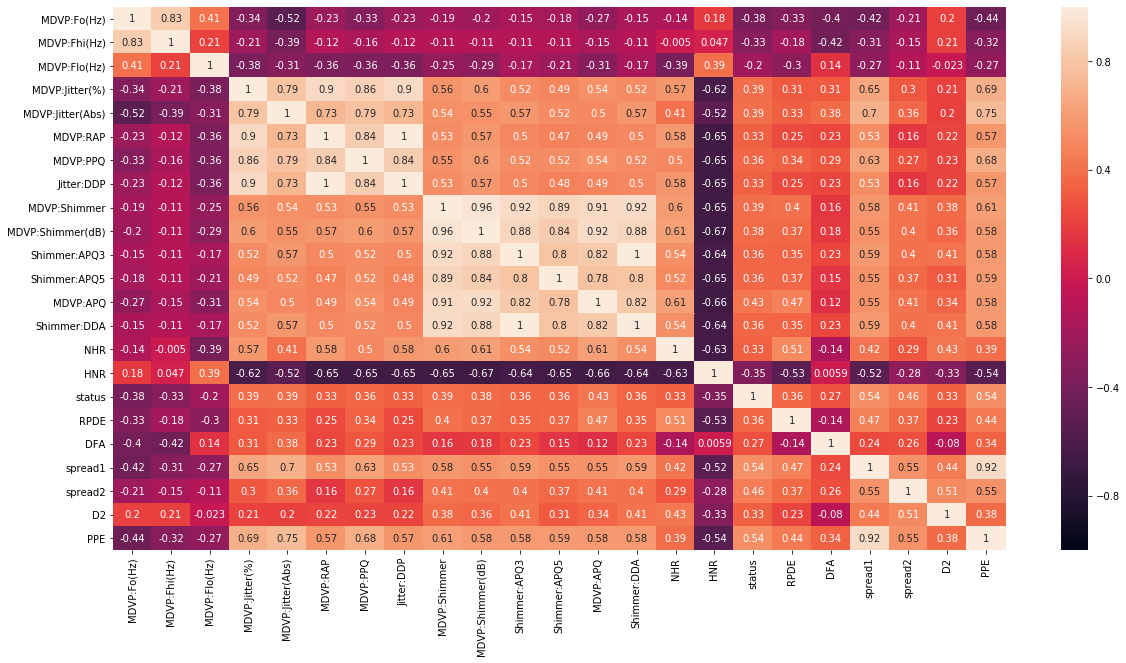

In [112]:
#Visualization using a HeatMap
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True) #High, Low, MDVP Jitter %, MDVP RAP, MDVP PPQ, Jitter DDP

In [113]:
#Pairplot of the dataframe
#sns.pairplot(data = df, hue = 'status', diag_kind = 'kde')

Interpretation combining Heat Map and Pair Plot:

1) The column 'MDVP:Fo(Hz)' which represents the Average Vocal Fundamental Frequency and 'MDVP:Fhi(Hz)' which represents the Maximum Vocal Fundamental Frequency shows a better separartion between classes than the column 'MDVP:Flo(Hz)'. Therefore 'MDVP:Flo(Hz)' can be dropped.

2)  The columns 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP' have a high correlation of above 0.7 between them. From the Heat Map, 'MDVP:RAP' and 'JItter:DDP' have a correlation of 1.0 between them. Therefore one of them can be dropped. Also from the Pair Plot, the two columns do not show a clear separation between the classes.

3) The 'Shimmer:APQ3' and 'Shimmer:DDA' have a correlation of 1.0 between them and same correlation with the other columns. Therefore one of them can be dropped.

4) The column 'DFA' can be dropped as it has a correlation of only 0.27 with 'status'. Also from the Pair Plot, the classes highly overlap not creating a distinct boundary between them.

In [114]:
#Creating a copy of the dataframe and dropping the columns mentioned above
df1 = df.drop(['MDVP:Flo(Hz)', 'Jitter:DDP', 'Shimmer:DDA', 'DFA'], axis = 1)

In [115]:
df1.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE
0,119.992,157.302,0.00784,0.00007,0.00370,0.00554,0.04374,0.426,0.02182,0.03130,0.02971,0.02211,21.033,1,0.414783,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,0.00968,0.00008,0.00465,0.00696,0.06134,0.626,0.03134,0.01650,0.04368,0.01929,19.085,1,0.458359,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,0.01050,0.00009,0.00544,0.00314,0.05233,0.482,0.02757,0.03858,0.03590,0.01309,20.651,1,0.429895,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,0.00997,0.00009,0.00502,0.00698,0.05492,0.517,0.02924,0.04005,0.03772,0.01353,20.644,1,0.434969,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,0.01284,0.00011,0.00655,0.00314,0.06425,0.584,0.03490,0.01650,0.04465,0.01767,19.649,1,0.417356,-3.747787,0.234513,2.332180,0.410335


In [116]:
#Creating the Feature Set X and Target Set y
X = df1.drop('status', axis = 1)
y = df1['status']

In [117]:
#Creating the Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [118]:
#Creating a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
print("Training Accuracy :", (lgr.score(X_train, y_train)))
print("Testing Accuracy :", (lgr.score(X_test, y_test)))

Training Accuracy : 0.863013698630137
Testing Accuracy : 0.7755102040816326


C:\Users\hari_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression performs poor with this dataset because the independent variables are still correlated with each other. Regression model requires the features to be independent of each other. 

In [119]:
#Creating a Regularized Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt_model.fit(X_train, y_train)
print("Training Accuracy :", (dt_model.score(X_train, y_train)))
print("Testing Accuracy :", (dt_model.score(X_test, y_test)))

Training Accuracy : 0.958904109589041
Testing Accuracy : 0.8979591836734694


In [120]:
#Confusion Matrix is a reliable metric as this is an unbalanced class dataset
y_dt_pred = dt_model.predict(X_test)
metrics.confusion_matrix(y_test,y_dt_pred)

array([[ 9,  3],
       [ 2, 35]], dtype=int64)

In [121]:
#Using the Ensemble Technique 'Random Forest'
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=1)
rfcl.fit(X_train, y_train)
print("Training Accuracy :", (rfcl.score(X_train, y_train)))
print("Testing Accuracy :", (rfcl.score(X_test, y_test)))
print("Out Of Bag Score :", (rfcl.oob_score_))

Training Accuracy : 0.9863013698630136
Testing Accuracy : 0.9591836734693877
Out Of Bag Score : 0.863013698630137


C:\Users\hari_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\hari_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [122]:
y_rfcl_pred = rfcl.predict(X_test)
metrics.confusion_matrix(y_test,y_rfcl_pred)

array([[10,  2],
       [ 0, 37]], dtype=int64)

In [123]:
#Using the Ensemble Technique 'Gradient Boosting'
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=10, random_state=1)
gbcl.fit(X_train,y_train)
print("Training Accuracy :", (gbcl.score(X_train, y_train)))
print("Testing Accuracy :", (gbcl.score(X_test, y_test)))

Training Accuracy : 0.9657534246575342
Testing Accuracy : 0.8979591836734694


Conclusion :

1) 'Random Forest' produces the highest accuracy of 95.91%.

2) With the Random Forest Algorithm, the under represented class, 'Healthy Class', has achieved a Precision and Recall of 100%.

3) This suggests the higher represented class will too have a higher Precision and Recall.